In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load data

cwd = os.getcwd()
if os.path.basename(cwd) == "dataset":
    PROJECT_ROOT = os.path.dirname(cwd)
else:
    PROJECT_ROOT = cwd

data_path = os.path.join(PROJECT_ROOT, "data", "agg_df.csv")

if not os.path.exists(data_path):
    raise FileNotFoundError(f"[Error] Could not find file: {data_path}")

print(f"Loading dataset from: {data_path}")
df = pd.read_csv(data_path)

print("Dataset loaded:", df.shape, "rows/columns")


Loading dataset from: /Users/lisahercot/code/Lisaht03/project_accidents/data/agg_df.csv
Dataset loaded: (204145, 25) rows/columns


In [50]:
# 1) BASIC INFO

print("\n=== DATASET INFO ===")
print(df.info())

print("\n=== FIRST 5 ROWS ===")
display(df.head())



=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204145 entries, 0 to 204144
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   accident_number    204145 non-null  int64  
 1   date               204145 non-null  object 
 2   day_of_week        204145 non-null  object 
 3   hour               204145 non-null  int64  
 4   road_category      204145 non-null  object 
 5   road_layout        204145 non-null  object 
 6   num_lanes          204145 non-null  int64  
 7   reserved_lane      204145 non-null  object 
 8   road_profile       204145 non-null  object 
 9   road_shape         204145 non-null  object 
 10  surface_condition  204145 non-null  object 
 11  infrastructure     204145 non-null  object 
 12  road_location      204145 non-null  object 
 13  speed_limit        204145 non-null  int64  
 14  injury_severity    204145 non-null  int64  
 15  users_involved     204145 non

,accident_number,date,day_of_week,hour,road_category,road_layout,num_lanes,reserved_lane,road_profile,road_shape,...,users_involved,light_conditions,department,urban_area,intersection_type,weather,collision_type,latitude,longitude,region
0,201900000001,2019-11-30,Saturday,1,Major Roads,Multi Lane,10,No value,Flat,Curved,...,3,Night,93,Outside urban area,No junction,Normal,2-car collision,48.896210,2.470120,Île-de-France
1,201900000002,2019-11-30,Saturday,2,Major Roads,One Way,2,No value,Slope / Near Slope,Curved,...,1,Night,93,Outside urban area,No junction,Normal,Multi-car collision,48.930700,2.368800,Île-de-France
2,201900000003,2019-11-28,Thursday,15,Major Roads,Multi Lane,8,No value,Flat,Curved,...,4,Day,92,Outside urban area,No junction,Normal,Multi-car collision,48.935872,2.319174,Île-de-France
3,201900000004,2019-11-30,Saturday,20,Major Roads,Multi Lane,5,No value,Flat,Straight,...,4,Night,94,Outside urban area,No junction,Normal,Multi-car collision,48.817329,2.428150,Île-de-France
4,201900000005,2019-11-30,Saturday,4,Major Roads,One Way,3,No value,Flat,Curved,...,3,Night,94,Outside urban area,No junction,Normal,2-car collision,48.776362,2.433254,Île-de-France


In [51]:
# 2) MISSING VALUES

print("\n=== MISSING VALUES PER COLUMN ===")
missing = df.isna().sum().sort_values(ascending=False)
display(missing)


=== MISSING VALUES PER COLUMN ===


light_conditions     6
accident_number      0
speed_limit          0
longitude            0
latitude             0
collision_type       0
weather              0
intersection_type    0
urban_area           0
department           0
users_involved       0
injury_severity      0
road_location        0
date                 0
infrastructure       0
surface_condition    0
road_shape           0
road_profile         0
reserved_lane        0
num_lanes            0
road_layout          0
road_category        0
hour                 0
day_of_week          0
region               0
dtype: int64

In [52]:
# CLEAN MISSING VALUES

# 6 rows with missing light conditions
def classify_light_condition(hour):
    if 7 <= hour <= 18:
        return "Day"
    elif 5 <= hour <= 6 or 19 <= hour <= 20:
        return "Twilight"
    else:
        return "Night"

mask = df['light_conditions'].isna()

df.loc[mask, 'light_conditions'] = (
    df.loc[mask, 'hour']
            .apply(classify_light_condition)
)


# Keep only rows with numeric department codes
# This removes 2251 rows corresponding to Corsica ('2A'/'2B') and overseas territories
df = df[df['department'].astype(str).str.isdigit().fillna(False)]

# Define Île-de-France department codes
idf_departments = {75, 77, 78, 91, 92, 93, 94, 95}

# Convert to integer
df['department'] = df['department'].astype(int)

# Keep only IDF rows
df = df[df['department'].isin(idf_departments)]

department_mapping = {
    75: "Paris",
    77: "Seine-et-Marne",
    78: "Yvelines",
    91: "Essonne",
    92: "Hauts-de-Seine",
    93: "Seine-Saint-Denis",
    94: "Val-de-Marne",
    95: "Val-d'Oise"
}

df['department'] = df['department'].map(department_mapping)

In [53]:
# 3) SUMMARY STATISTICS

# Remove accident_number from dataframe
if "accident_number" in df.columns:
    df = df.drop(columns=["accident_number"])

print("\n=== NUMERICAL SUMMARY ===")
display(df.describe())

print("\n=== CATEGORICAL SUMMARY ===")
cat_cols = df.select_dtypes(include=["object"]).columns
display(df[cat_cols].describe())



=== NUMERICAL SUMMARY ===


,hour,num_lanes,speed_limit,injury_severity,users_involved,latitude,longitude
count,65093.000000,65093.000000,65093.000000,65093.000000,65093.000000,65093.000000,65093.000000
mean,13.587237,2.867144,56.467823,1.115450,2.241255,48.844406,2.365560
std,5.564935,1.690008,22.010735,0.354137,1.051954,0.180948,0.161170
min,0.000000,1.000000,10.000000,1.000000,1.000000,11.000000,1.457612
25%,9.000000,2.000000,50.000000,1.000000,2.000000,48.812927,2.293221
50%,14.000000,2.000000,50.000000,1.000000,2.000000,48.859243,2.357544
75%,18.000000,4.000000,70.000000,1.000000,2.000000,48.900471,2.437790
max,23.000000,12.000000,130.000000,3.000000,41.000000,49.200773,11.000000



=== CATEGORICAL SUMMARY ===


,date,day_of_week,road_category,road_layout,reserved_lane,road_profile,road_shape,surface_condition,infrastructure,road_location,light_conditions,department,urban_area,intersection_type,weather,collision_type,region
count,65093,65093,65093,65093,65093,65093,65093,65093,65093,65093,65093,65093,65093,65093,65093,65093,65093
unique,1461,7,4,3,3,2,2,2,4,4,3,8,2,4,7,3,1
top,2019-12-20,Friday,Local & Access Roads,Two Way,No value,Flat,Straight,Normal,No value,Road,Day,Paris,Inside urban area,No junction,Normal,2-car collision,Île-de-France
freq,93,10593,31832,32847,56711,56222,58260,50014,55403,57285,42877,20168,49614,37492,53040,36294,65093



=== NUMERICAL HISTOGRAMS ===


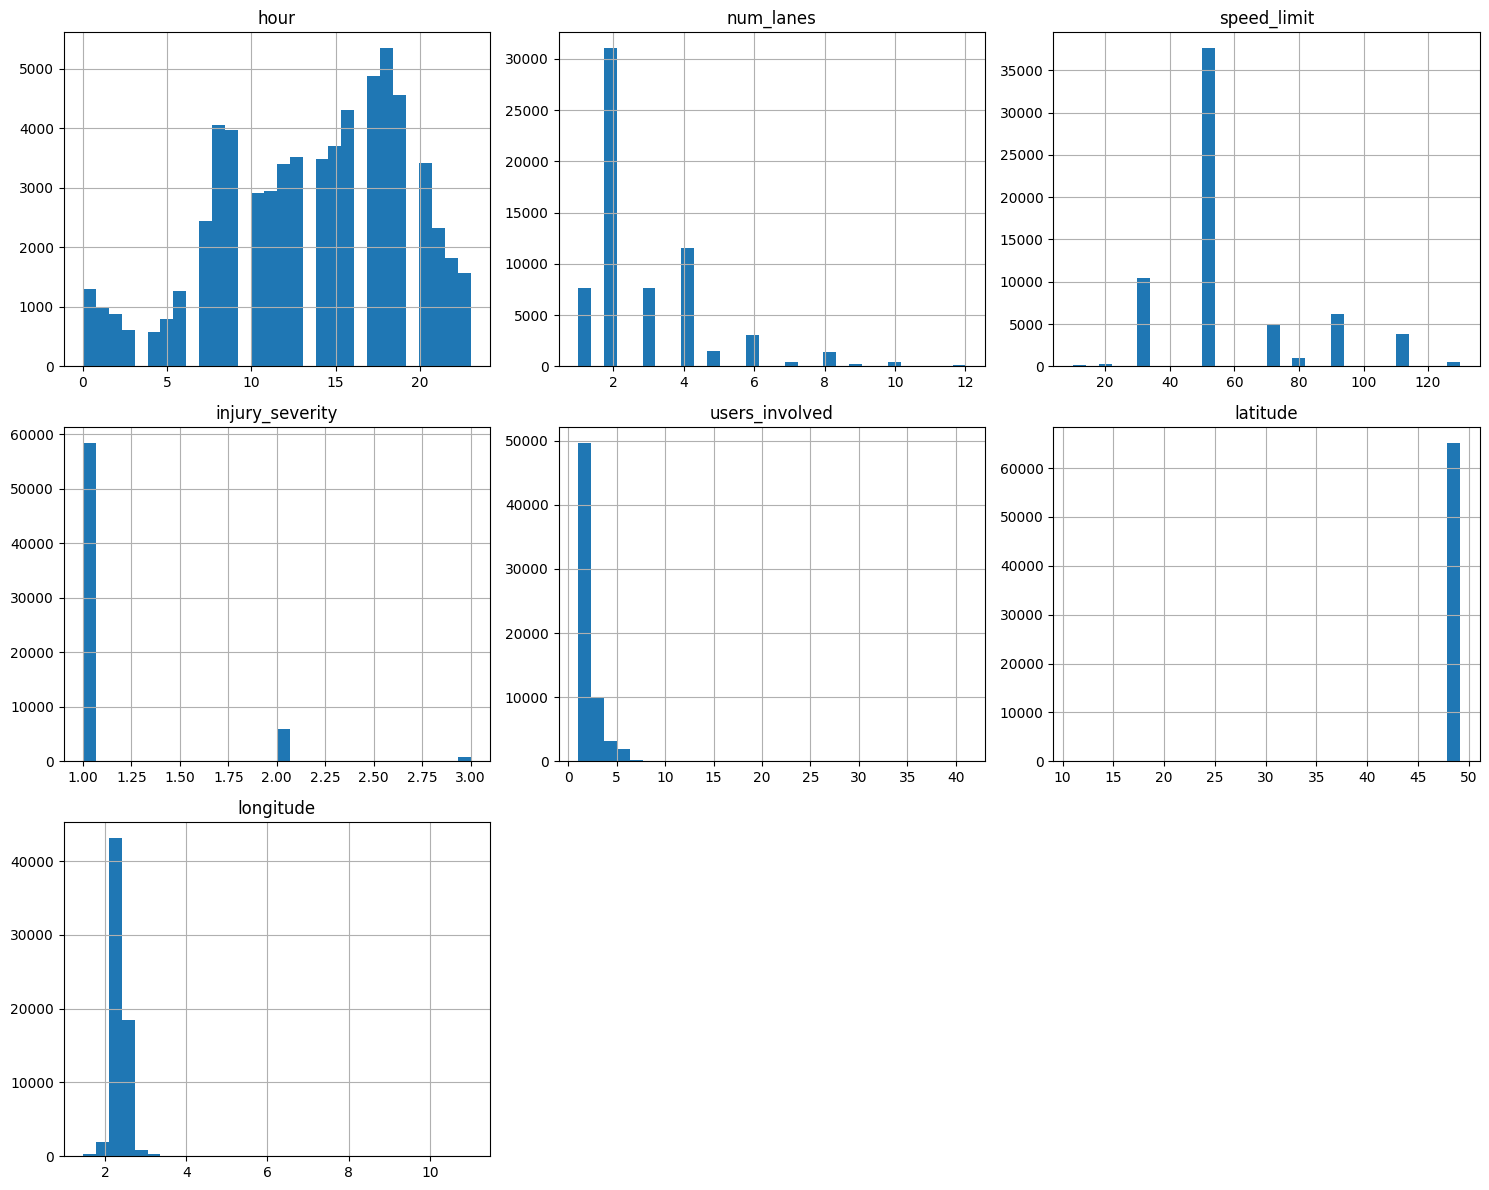

In [54]:
# 4) HISTOGRAMS FOR NUMERICAL COLUMNS

# Remove accident_number from dataframe
if "accident_number" in df.columns:
    df = df.drop(columns=["accident_number"])

num_cols = df.select_dtypes(include=[np.number]).columns

print("\n=== NUMERICAL HISTOGRAMS ===")
df[num_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

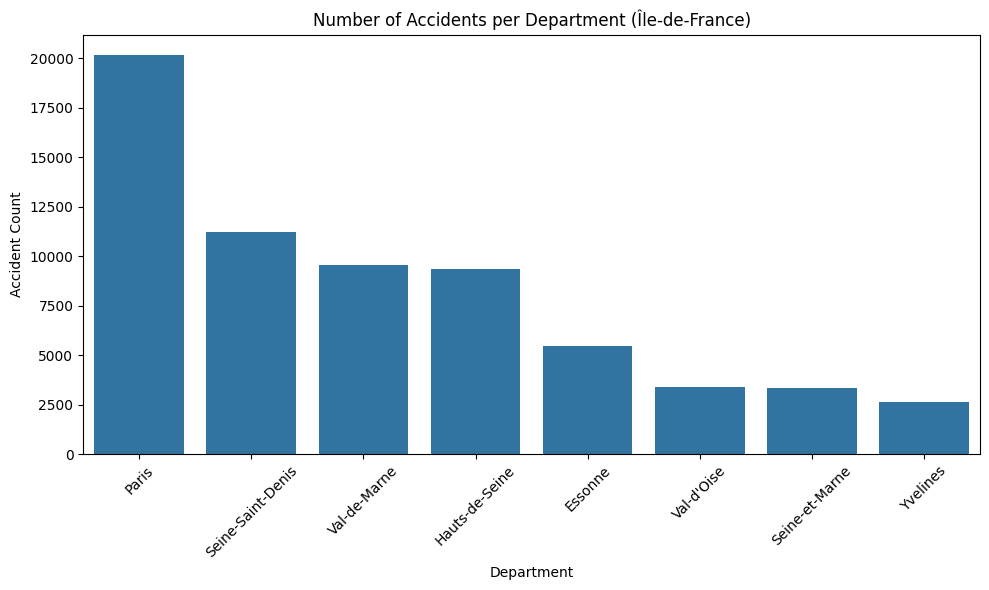

In [ ]:
#1st VISUAL: HISTOGRAM OF ACCIDENTS BY DEPARTMENT

plt.figure(figsize=(10, 6))
sns.countplot(data=df_idf, x='department_name', order=df_idf['department_name'].value_counts().index)
plt.title("Number of Accidents per Department (Île-de-France)")
plt.xlabel("Department")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


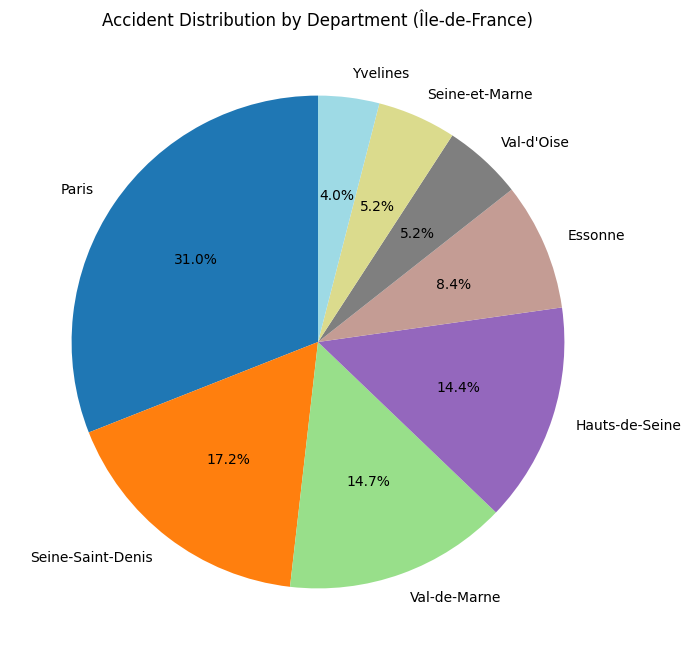

In [ ]:
# 2nd VISUAL: PIE CHART DISTRIBUTION

plt.figure(figsize=(8, 8))
df_idf['department_name'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    cmap='tab20'
)
plt.title("Accident Distribution by Department (Île-de-France)")
plt.ylabel("")
plt.show()

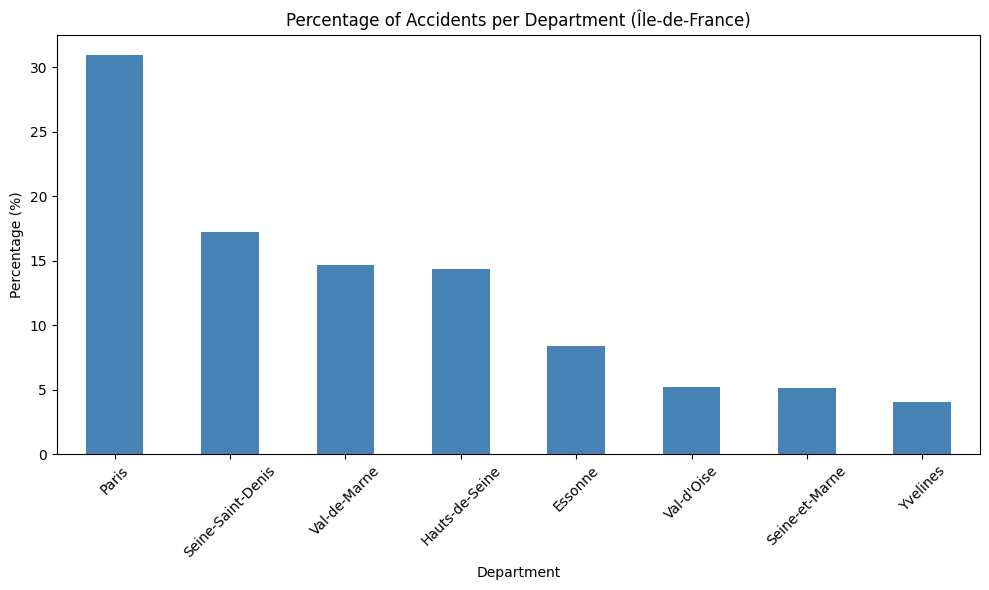

In [ ]:
# 3rd VISUAL: BARPLOT WITH PERCENTAGES

dept_counts = df_idf['department_name'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
dept_counts.plot(kind="bar", color="steelblue")
plt.title("Percentage of Accidents per Department (Île-de-France)")
plt.xlabel("Department")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== CATEGORICAL DISTRIBUTIONS ===


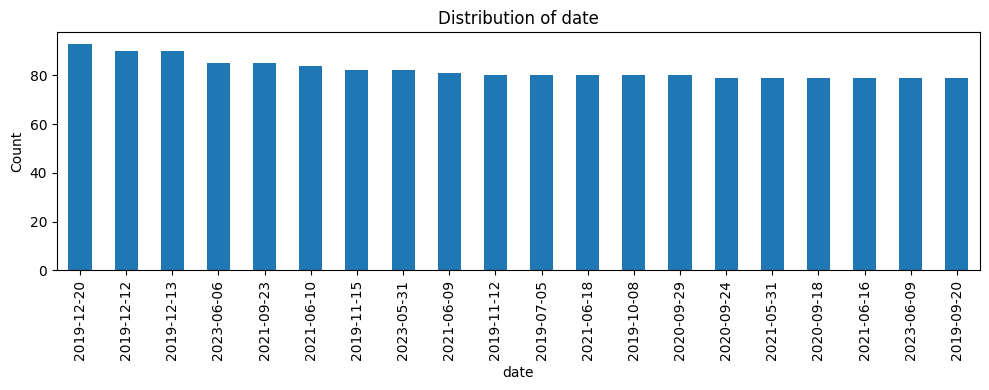

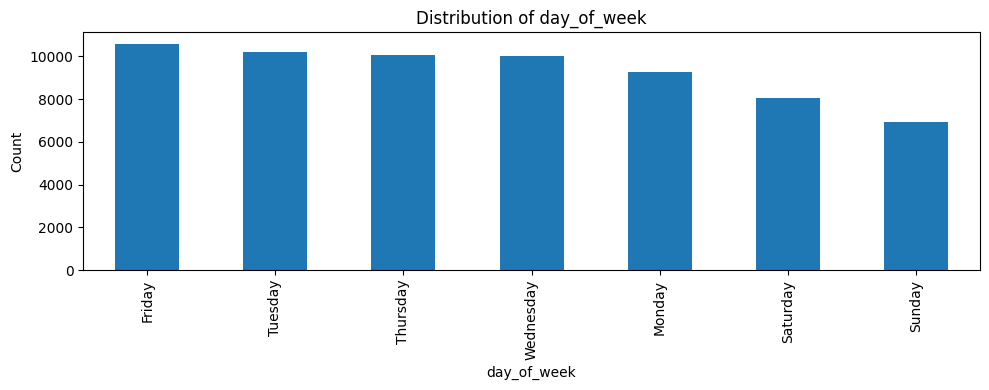

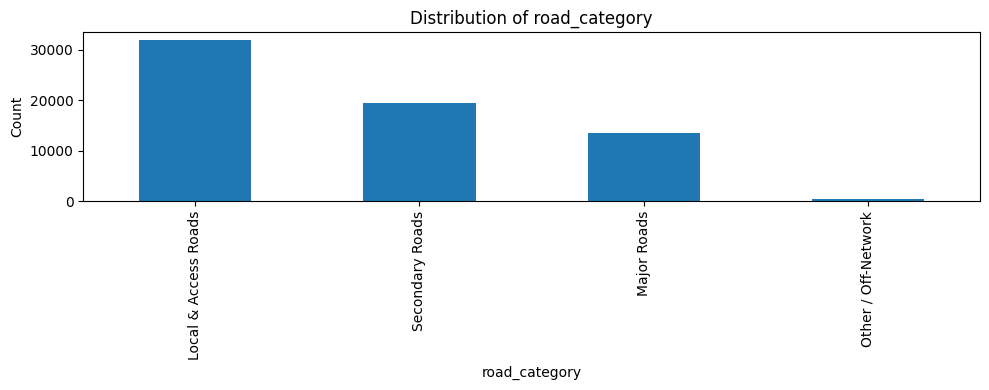

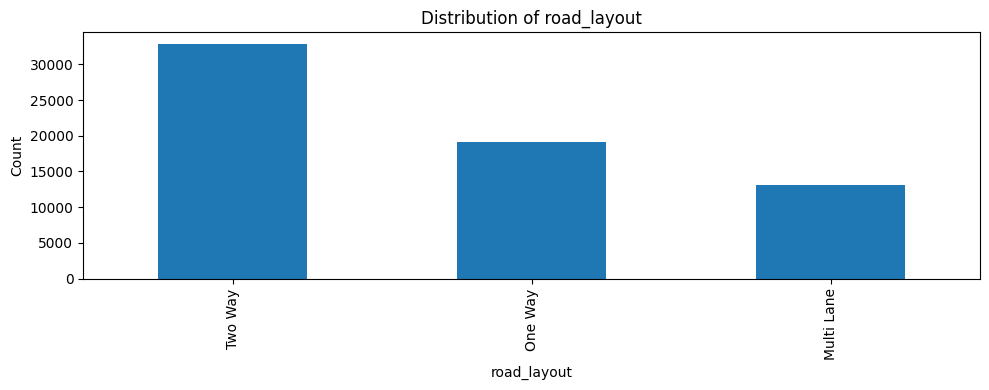

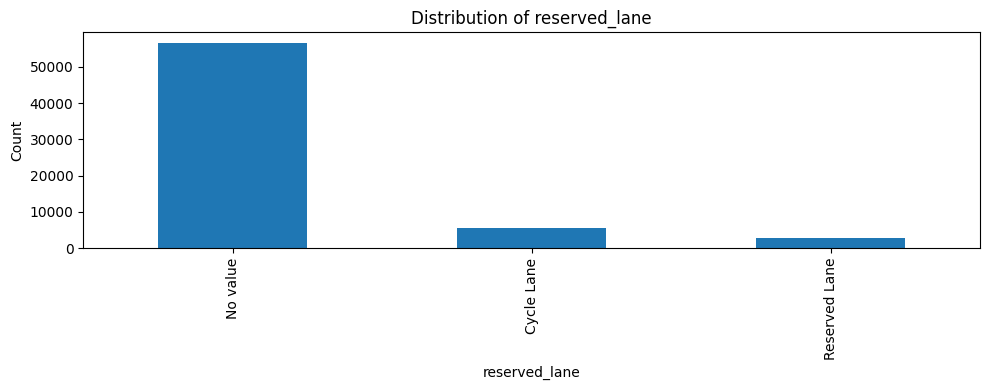

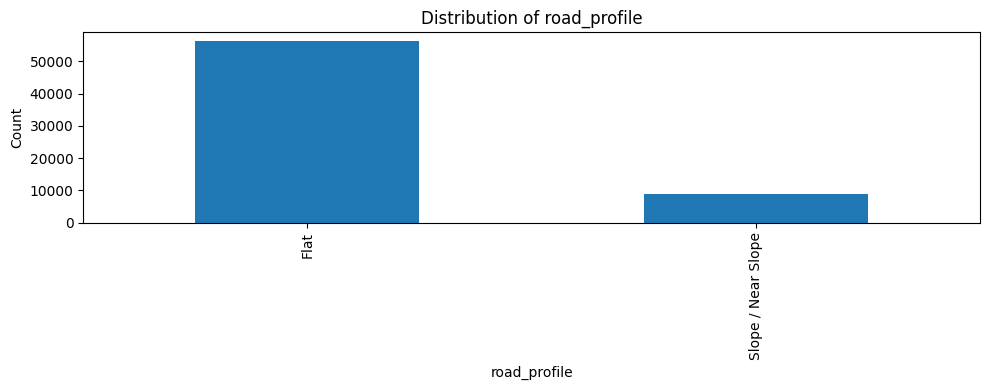

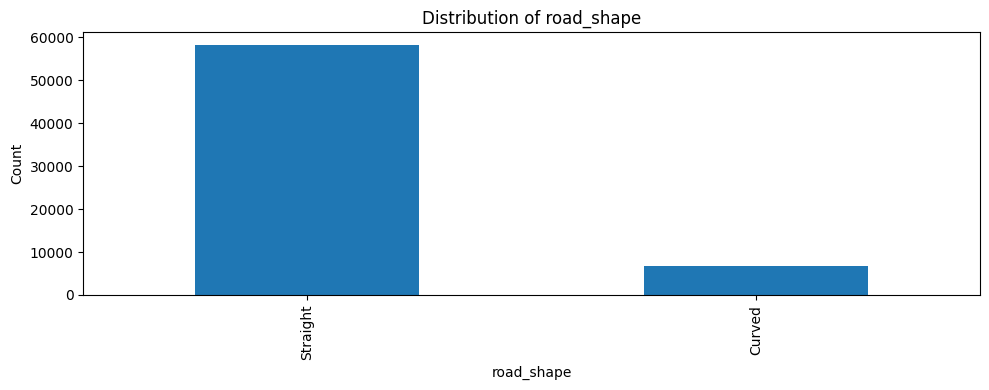

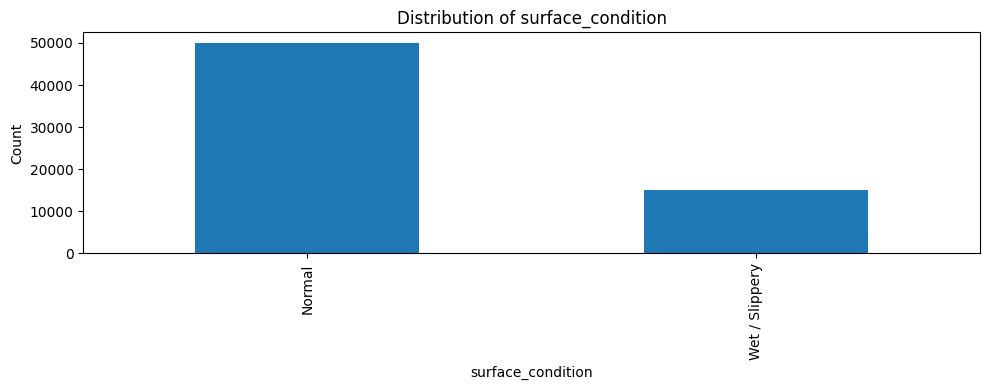

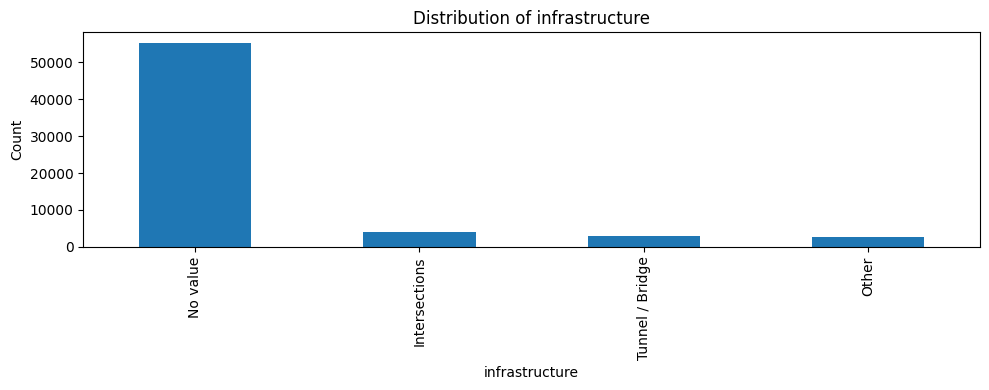

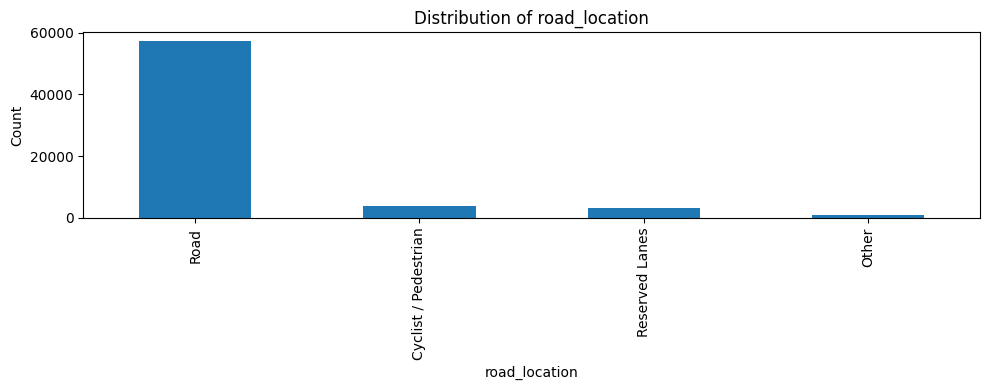

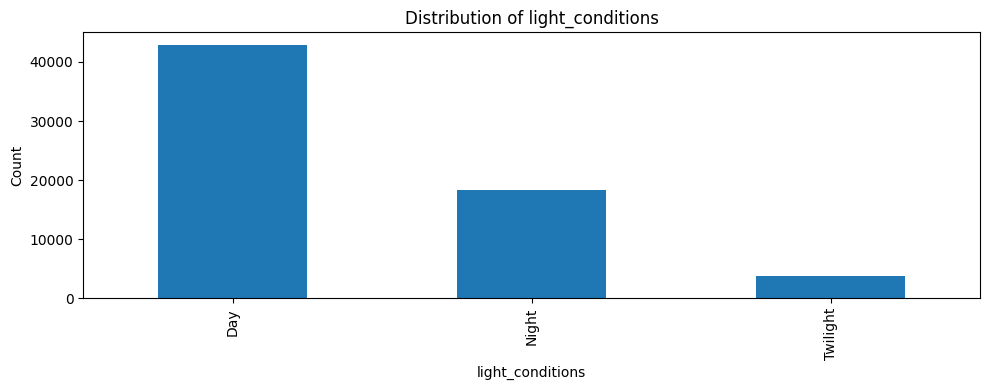

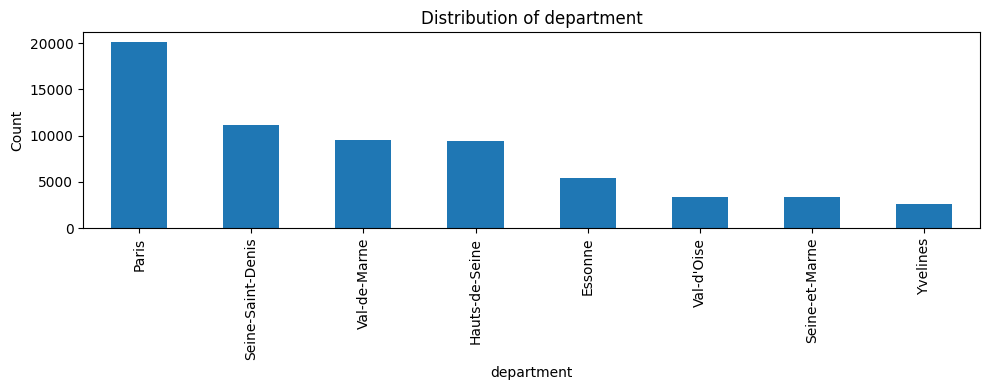

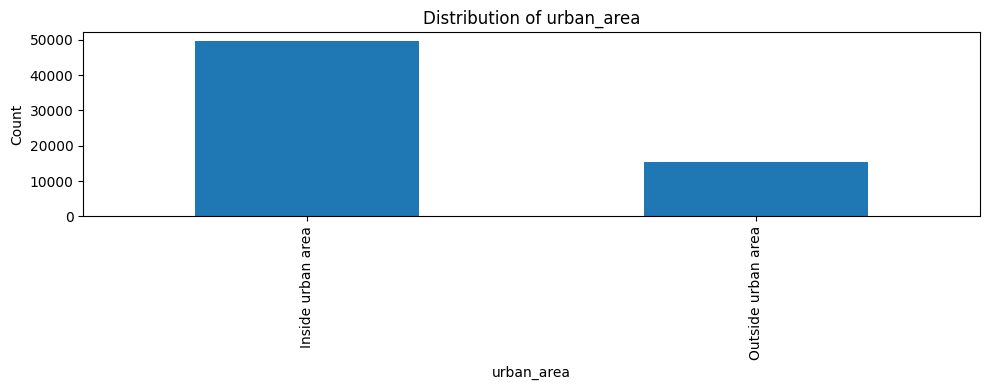

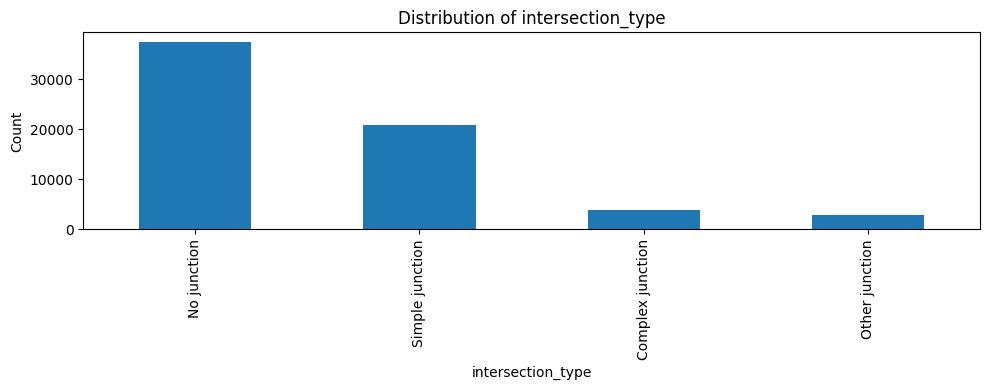

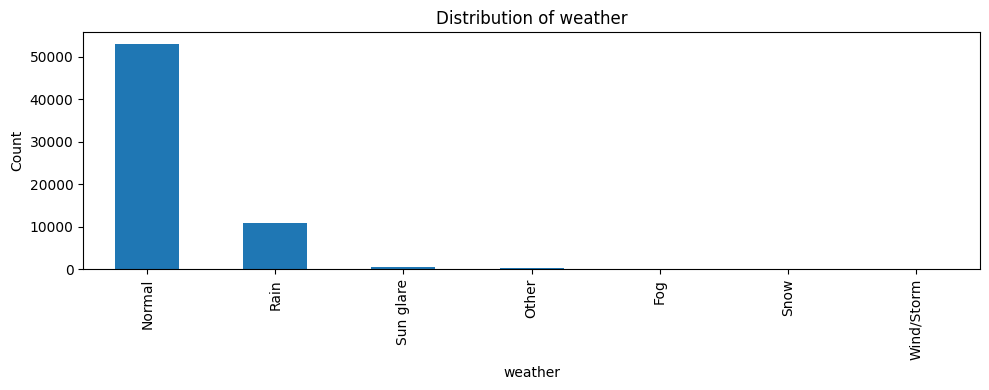

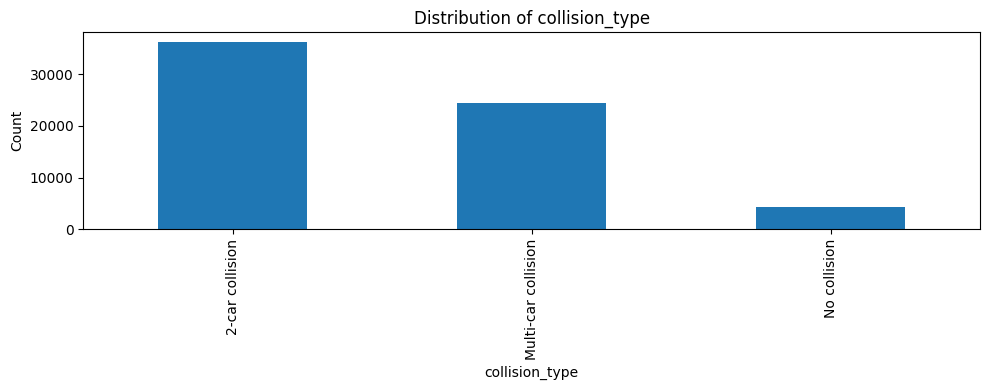

In [61]:
# 5) BAR PLOTS FOR CATEGORICAL VARIABLES

print("\n=== CATEGORICAL DISTRIBUTIONS ===")

cat_cols = [c for c in cat_cols if c != "region"]

for col in cat_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()



=== CORRELATION HEATMAP (NUMERIC FEATURES) ===

Numeric columns used for correlation:
['accident_number', 'hour', 'num_lanes', 'speed_limit', 'injury_severity', 'users_involved', 'department', 'latitude', 'longitude']


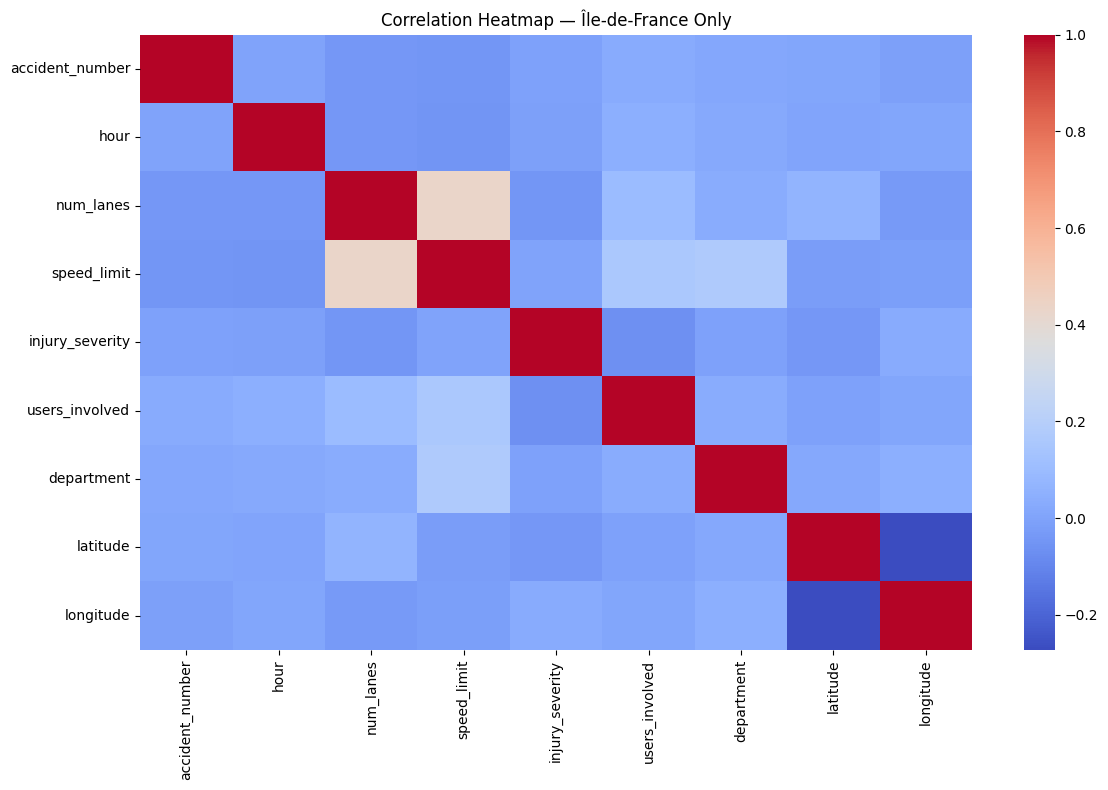

In [ ]:
# 6) CORRELATION HEATMAP

print("\n=== CORRELATION HEATMAP (NUMERIC FEATURES) ===")

num_cols_idf = df_idf.select_dtypes(include=["number"]).columns.tolist()

print("\nNumeric columns used for correlation:")
print(num_cols_idf)


plt.figure(figsize=(12, 8))
sns.heatmap(df_idf[num_cols_idf].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap — Île-de-France Only")
plt.tight_layout()
plt.show()


In [22]:
# 7) SAVE CLEAN SUMMARY STATS

df.describe().to_csv("numeric_summary_stats.csv")
df[cat_cols].describe().to_csv("categorical_summary_stats.csv")

print("\nSaved summary statistics:")
print(" - numeric_summary_stats.csv")
print(" - categorical_summary_stats.csv")


Saved summary statistics:
 - numeric_summary_stats.csv
 - categorical_summary_stats.csv



=== Severity Breakdown by Île-de-France Department ===
injury_severity    slightly_injured  hospitalized  killed  total_accidents  \
department                                                                   
Seine-et-Marne                 2419           779     166             3364   
Yvelines                       1952           570      87             2609   
Val-d'Oise                     2827           498      68             3393   
Essonne                        4730           623      95             5448   
Hauts-de-Seine                 8632           667      73             9372   
Seine-Saint-Denis             10101          1016      82            11199   
Val-de-Marne                   8782           690      68             9540   
Paris                         18893          1156     119            20168   

injury_severity    severe_accidents  severe_rate  death_rate  
department                                                    
Seine-et-Marne                  945  

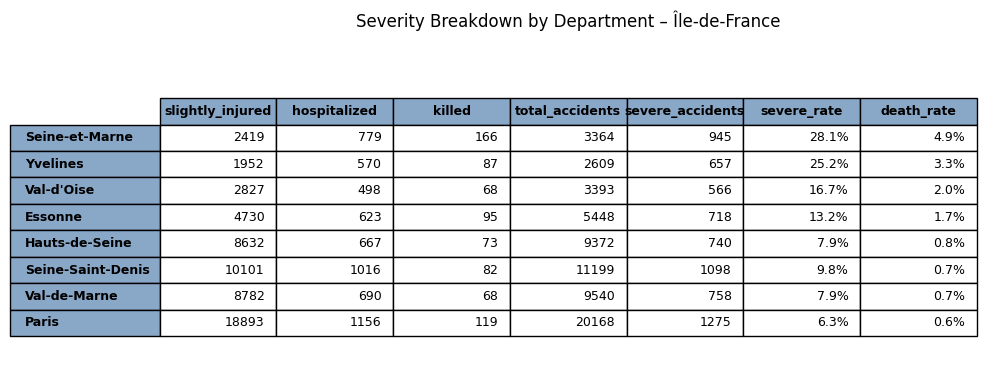

In [84]:
# 8) TABLE OF ACCIDENT SEVERITY IN ILE-DE-FRANCE

# a) Count each severity level per department
severity_counts = (
    df.groupby("department")["injury_severity"]
      .value_counts()
      .unstack(fill_value=0)
)

for col in [1, 2, 3]:
    if col not in severity_counts.columns:
        severity_counts[col] = 0

# b) Rename columns
severity_counts = severity_counts.rename(columns={
    1: "slightly_injured",
    2: "hospitalized",
    3: "killed"
})

# c) Add totals and rates
severity_counts["total_accidents"] = (
    severity_counts["slightly_injured"]
    + severity_counts["hospitalized"]
    + severity_counts["killed"]
)

severity_counts["severe_accidents"] = (
    severity_counts["hospitalized"]
    + severity_counts["killed"]
)

severity_counts["severe_rate"] = (
    severity_counts["severe_accidents"] / severity_counts["total_accidents"]
)

severity_counts["death_rate"] = (
    severity_counts["killed"] / severity_counts["total_accidents"]
)

# d) Sort by highest death rate
summary_table = severity_counts.sort_values("death_rate", ascending=False)

print("\n=== Severity Breakdown by Île-de-France Department ===")
print(summary_table)


# e) Reorder columns for readability
cols_order = [
    "slightly_injured",
    "hospitalized",
    "killed",
    "total_accidents",
    "severe_accidents",
    "severe_rate",
    "death_rate",
]

table_df = summary_table[cols_order].copy()

# f) Format rates as percentages with 1 decimal
for col in ["severe_rate", "death_rate"]:
    table_df[col] = (table_df[col] * 100).round(1).astype(str) + "%"

# g) Create a table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")

# h) Build table
tbl = ax.table(
    cellText=table_df.values,
    rowLabels=table_df.index,
    colLabels=table_df.columns,
    loc="center"
)

# i) Make it prettier
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1.1, 1.5)  # (cols, rows) scaling

# j) Bold header row
for (row, col), cell in tbl.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#89a7c7")

plt.title("Severity Breakdown by Department – Île-de-France", pad=20)
plt.tight_layout()

# k) Save to file
plt.savefig("idf_severity_table.png", dpi=200, bbox_inches="tight")

plt.show()


Unique severity values after mapping: ['slightly_injured' 'hospitalized' 'killed']

=== Accident Severity Breakdown by Department (Île-de-France) ===
severity_clean     hospitalized  killed  slightly_injured  total_accidents  \
department                                                                   
Seine-et-Marne              779     166              2419             3364   
Yvelines                    570      87              1952             2609   
Val-d'Oise                  498      68              2827             3393   
Essonne                     623      95              4730             5448   
Hauts-de-Seine              667      73              8632             9372   
Seine-Saint-Denis          1016      82             10101            11199   
Val-de-Marne                690      68              8782             9540   
Paris                      1156     119             18893            20168   

severity_clean     death_rate  hospitalization_rate  slight_injury_ra

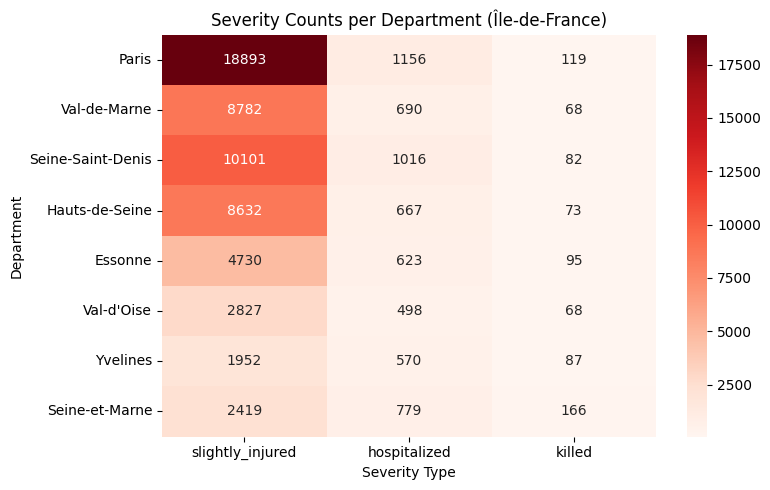

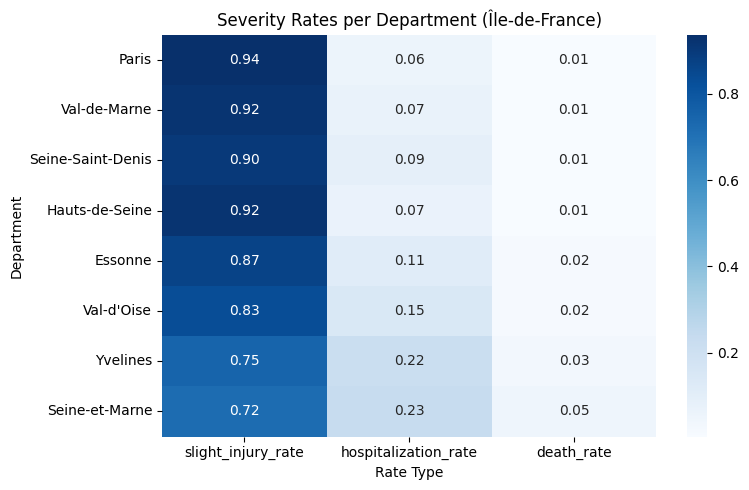

In [ ]:
# 9) HEATMAP OF INJURY SEVERITY BY DEPARTMENT IN ILE-DE-FRANCE

# a) Map severity labels to cleaner names
SEVERITY_MAP = {
    "1: Slightly Injured": "slightly_injured",
    "2: Hospitalized": "hospitalized",
    "3: Killed": "killed",
    1: "slightly_injured",
    2: "hospitalized",
    3: "killed",
}

df["severity_clean"] = df["injury_severity"].map(SEVERITY_MAP)

# ---sanity check---
print("Unique severity values after mapping:", df["severity_clean"].unique())

# b) Count severity per department
severity_counts = (
    df.groupby("department")["severity_clean"]
      .value_counts()
      .unstack(fill_value=0)
)

# ensure all three columns exist even if 0
for col in ["slightly_injured", "hospitalized", "killed"]:
    if col not in severity_counts.columns:
        severity_counts[col] = 0

# c) Add totals and rates
severity_counts["total_accidents"] = severity_counts[["slightly_injured", "hospitalized", "killed"]].sum(axis=1)
severity_counts["death_rate"] = severity_counts["killed"] / severity_counts["total_accidents"]
severity_counts["hospitalization_rate"] = severity_counts["hospitalized"] / severity_counts["total_accidents"]
severity_counts["slight_injury_rate"] = severity_counts["slightly_injured"] / severity_counts["total_accidents"]

# d) Sort table by death_rate (highest first)
severity_table = severity_counts.sort_values("death_rate", ascending=False)

print("\n=== Accident Severity Breakdown by Department (Île-de-France) ===")
print(severity_table)

# Reverse the order in heatmaps so top = most severe
severity_table_rev = severity_table.iloc[::-1]


# e) Heatmap of severity counts
plt.figure(figsize=(8, 5))
sns.heatmap(
    severity_table_rev[["slightly_injured", "hospitalized", "killed"]],
    annot=True, fmt="d", cmap="Reds"
)
plt.title("Severity Counts per Department (Île-de-France)")
plt.xlabel("Severity Type")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


# f) Heatmap of severity rates
plt.figure(figsize=(8, 5))
sns.heatmap(
    severity_table_rev[["slight_injury_rate", "hospitalization_rate", "death_rate"]],
    annot=True, fmt=".2f", cmap="Blues"
)
plt.title("Severity Rates per Department (Île-de-France)")
plt.xlabel("Rate Type")
plt.ylabel("Department")
plt.tight_layout()
plt.show()
